# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1dExAiYzuM7PZZVNeOQCzTYixTgWH3fiy?usp=sharing)

https://wikidocs.net/35821

06-07 다중 입력에 대한 실습

독립 변수 x
가 2개 이상인 경우에 대해서 학습합니다. 비용 함수와 옵티마이저 등을 사용하는 방법은 동일합니다.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

1. 다중 선형 회귀

딥 러닝 챕터로 들어가게되면 대부분의 입력들은 독립 변수가 2개 이상입니다. 모델을 직접 코딩하는 관점에서는 입력 벡터의 차원이 2이상이라고 할 수 있습니다. y
를 결정하는데 있어 독립 변수가 3개인 선형 회귀를 풀어봅시다. 중간 고사, 기말 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있습니다.


Midterm(
)	Final(
)	Added point(
)	Score($1000)(y)
70	85	11	73
71	89	18	82
50	80	20	72
99	20	10	57
50	10	10	34
20	99	10	58
40	50	20	56

H(X) = {w_1x_1 + w_2x_2 + w_3x_3 + b}

3개의 특성을 가진 벡터 [x1, x2, x3]
를 대문자 X
로 표기합니다.

위 데이터의 샘플 중 상위 5개의 데이터만 훈련에 사용하고, 나머지 2개는 테스트에 사용해보겠습니다. 입력의 차원이 3으로 바뀌면서, input_dim의 인자값이 3으로 변경됩니다. 이는 입력 벡터의 X
의 원소의 개수가 3개라고도 표현할 수 있고, 입력 벡터 X
의 차원이 3임을 의미합니다.

In [2]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70, 85, 11], [71, 89, 18], [50, 80, 20], [99, 20, 10], [50, 10, 10]])
y = np.array([73, 82, 72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim = 3, activation = 'linear'))

sgd = optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer = sgd, loss='mse', metrics = ['mse'])
model.fit(X, y, epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 1s 544ms/step - loss: 14986.2393 - mse: 14986.2393
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 7929.8447 - mse: 7929.8447
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 4205.3057 - mse: 4205.3057
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 2238.7595 - mse: 2238.7595
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 1199.9869 - mse: 1199.9869
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 650.9744 - mse: 650.9744
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 360.5876 - mse: 360.5876
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 206.8305 - mse: 206.8305
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 125.2925 - mse: 125.2925
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 81.9539 - mse: 81.9539
Epoch 11/

모델의 학습이 끝났습니다. 학습된 모델에 입력 X에 대한 예측을 해봅시다.

In [3]:
print(model.predict(X))

1/1 [==============================] - 0s 77ms/step
[[72.940315]
 [81.972916]
 [72.089386]
 [57.113873]
 [33.807446]]


실제값에 근접한 예측을 하는 것을 볼 수 있습니다. 훈련할 때 사용하지 않았던 데이터를 가지고 예측 작업을 수행해보겠습니다.

In [4]:
X_test = np.array([[20, 99, 10], [40, 50, 20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 23ms/step
[[57.921284]
 [56.051098]]


2. 다중 로지스틱 회귀

y를 결정하는데 있어 독립 변수 x
가 2개인 로지스틱 회귀를 풀어봅시다. 꽃받침(Sepal)의 길이와 꽃잎(Petal)의 길이와 해당 꽃이 A인지 B인지가 적혀져 있는 데이터가 있을 때, 새로 조사한 꽃받침의 길이와 꽃잎의 길이로부터 무슨 꽃인지 예측할 수 있는 모델을 만들고자 한다면 이때 독립 변수 x
는 2개가 됩니다.

SepalLengthCm(
)	PetalLengthCm(
)	Species(y)
5.1	3.5	A
4.7	3.2	A
5.2	1.8	B
7	4.1	A
5.1	2.1	B

H(X) = sigmoid({w_1x_1 + w_2x_2 + b})

2개의 특성을 가진 벡터 [x1, x2]
를 대문자 X
로 표기합니다.

독립 변수가 2개인 좀 간단한 새로운 예를 들어서 이를 케라스로 구현해봅시다. 두 개의 입력 x1, x2
,
의 합이 2이상이면 출력값 y
가 1이 되고 두 개의 입력의 합이 2미만인 경우에만 출력값이 0이 되는 로직을 구현해봅시다.

앞서 실습한 로지스틱 회귀 코드와 거의 동일한데 달라진 점은 입력의 차원이 2로 바뀌면서 input_dim의 값이 2라는 점입니다. 이는 입력 벡터의 차원이 2임을 의미합니다.

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation = 'sigmoid'))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

model.fit(X, y, epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 0s 423ms/step - loss: 0.6856 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6850 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6845 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6840 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6835 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6830 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6825 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6820 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6815 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [============================

In [7]:
print(model.predict(X))

1/1 [==============================] - 0s 104ms/step
[[0.15006098]
 [0.44589984]
 [0.43179113]
 [0.78577113]
 [0.7759684 ]
 [0.76585066]]


입력의 합이 2이상인 경우에는 전부 값이 0.5를 넘는 것을 볼 수 있습니다.

3. 인공 신경망 다이어그램

다중 로지스틱 회귀를 인공 신경망의 형태로 표현하면 다음과 같습니다. 아직 인공 신경망을 배우지 않았음에도 이렇게 다이어그램으로 표현해보는 이유는 로지스틱 회귀를 일종의 인공 신경망 구조로 해석해도 무방함을 보여주기 위함입니다.

y = sigmoid(w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b) = σ(w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b)

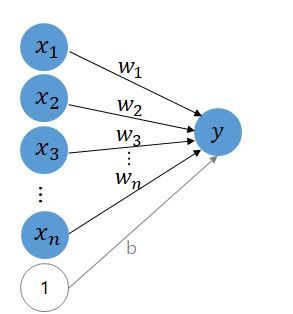